In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import os
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
def toMarkdown(x):
    s=format(x,'.2e')
    l=s.split('e')
    l[1]=str(int(l[1]))
    return l[0]+'\\times10^{'+l[1]+'}'

## 1.单摆测量重力加速度
平均数 A类不确定度

In [3]:
df = pd.read_csv('单摆.csv',index_col=0,header=0)
a=[0]*3
b=[0]*3
k=0
for i in df.index:
    for j in df.columns:
        a[k]+=df.loc[i][j]/5.0
    k+=1
   
k=0
for i in df.index:
    for j in df.columns:
        b[k]+=(df.loc[i][j]-a[k])**2/20
    k+=1
print(a)
for i in range(3):
    b[i]=b[i]**0.5*2.78
print(b)
#计算A类不确定度 平均数

[np.float64(20.016), np.float64(71.96600000000001), np.float64(85.72200000000001)]
[np.float64(0.011119999999999764), np.float64(0.05019420683704431), np.float64(0.06302695931108011)]


## 2.时间测量中随机误差的分布规律
##### 基础数据

In [4]:
def P(x,a_bar,sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-(x-a_bar)**2/(2*(sigma**2)))

f=open('时间.in','r')
n=200
a=[0]*(n+10)
mn=10
mx=0
a_bar=0
for i in range(1,n+1):
    a[i]=float(f.readline())
    mn=min(a[i],mn)
    mx=max(a[i],mx)
    a_bar+=a[i]/n
print('平均值:',a_bar)
print('最大值:',mx)
print('最小值:',mn)
sigma=sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1)
sigma=sigma**0.5
print('方差:',sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1))
print('标准差:',sigma)
print('极差:',mx-mn)


平均值: 3.0937999999999994
最大值: 3.48
最小值: 2.76
方差: 0.01828498492462312
标准差: 0.13522198388066609
极差: 0.7200000000000002


##### 计算分段 统计频率

In [5]:
# pf=pd.DataFrame(a[1:n+1])
b=[0]*14
b[0]=2.76+0.03
print("[",format(b[0]-0.03,'.2f'),",",format(b[0]+0.03,'.2f'),'],',end='')
for i in range(1,13):
    b[i]=b[i-1]+0.06
    print("(",format(b[i]-0.03,'.2f'),",",format(b[i]+0.03,'.2f'),'],',end='')

cnt=[0]*14
p=[0]*14
sigm=[0]*4
for i in range(1,n+1):
    for j in range(12):
        if b[j]-0.03<a[i]<=b[j]+0.03:
            cnt[j]+=1
        if b[j]-0.03==a[i] and j==0:
            cnt[j]+=1

for i in range(12):#下一行输出markdown表格格式
    print("|$(",format(b[i]-0.03,'.2f'),",",format(b[i]+0.03,'.2f'),']$|$',
          cnt[i],'$|$',format(cnt[i]/n,'.2f'),'$|$',format(cnt[i]/(n*0.06),'.2f'),
          '$|$',format(P(b[i],a_bar,sigma),'.2f'),'$|')

f.close()



[ 2.76 , 2.82 ],( 2.82 , 2.88 ],( 2.88 , 2.94 ],( 2.94 , 3.00 ],( 3.00 , 3.06 ],( 3.06 , 3.12 ],( 3.12 , 3.18 ],( 3.18 , 3.24 ],( 3.24 , 3.30 ],( 3.30 , 3.36 ],( 3.36 , 3.42 ],( 3.42 , 3.48 ],( 3.48 , 3.54 ],|$( 2.76 , 2.82 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.24 $|
|$( 2.82 , 2.88 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.58 $|
|$( 2.88 , 2.94 ]$|$ 14 $|$ 0.07 $|$ 1.17 $|$ 1.17 $|
|$( 2.94 , 3.00 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 1.94 $|
|$( 3.00 , 3.06 ]$|$ 19 $|$ 0.10 $|$ 1.58 $|$ 2.64 $|
|$( 3.06 , 3.12 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 2.95 $|
|$( 3.12 , 3.18 ]$|$ 21 $|$ 0.10 $|$ 1.75 $|$ 2.71 $|
|$( 3.18 , 3.24 ]$|$ 18 $|$ 0.09 $|$ 1.50 $|$ 2.04 $|
|$( 3.24 , 3.30 ]$|$ 22 $|$ 0.11 $|$ 1.83 $|$ 1.26 $|
|$( 3.30 , 3.36 ]$|$ 5 $|$ 0.03 $|$ 0.42 $|$ 0.64 $|
|$( 3.36 , 3.42 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.27 $|
|$( 3.42 , 3.48 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.09 $|


##### 统计$\sigma$分布

In [6]:
for i in range(12):
    cnt[i]=cnt[i]/(n*0.06)
    p[i]=P(b[i],a_bar,sigma)
for i in range(1,n+1):
    for j in range(1,4):
        if(abs(a[i]-a_bar)<=j*sigma):
            sigm[j]+=1
for i in range(1,4):
    print(i,sigm[i],sigm[i]/n)
print('A类不确定度:',sigma*1.96/(n**0.5))
#pf.to_csv('时间.csv')


1 133 0.665
2 191 0.955
3 200 1.0
A类不确定度: 0.01874081082643333


##### 画图

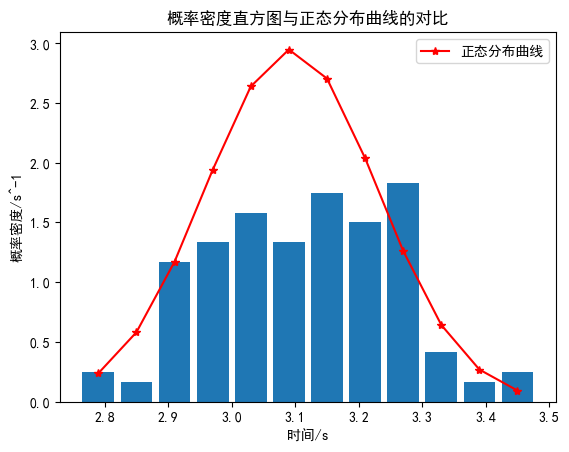

In [7]:
plt.bar(b[0:12],cnt[0:12],width=0.05)
plt.plot(b[0:12],p[0:12],color='red',label='正态分布曲线',marker='*')
plt.xlabel('时间/s')
plt.ylabel('概率密度/s^-1')
plt.title('概率密度直方图与正态分布曲线的对比')
plt.legend()
plt.show()

## 3.密立根油滴实验


##### 基础数据处理

In [8]:
f=open('密立根.in','r')
n=5
t=[0]*(n+10)
U=[0]*(n+10)
for i in range(1,n+1):
    s=f.readline().split()
    # print(s)
    U[i]=float(s[0])
    t[i]=float(s[1])+float(s[2])+float(s[3])
    t[i]=t[i]/3.0
    print("|$",i,"$|$",U[i],"$|$",s[1],"$|$",s[2],"$|$",s[3],"$|$",format(t[i],'.2f'),"$|")
f.close()

|$ 1 $|$ 129.0 $|$ 4 $|$ 4.28 $|$ 4.12 $|$ 4.13 $|
|$ 2 $|$ 98.0 $|$ 13.4 $|$ 13.58 $|$ 13.31 $|$ 13.43 $|
|$ 3 $|$ 152.0 $|$ 14.68 $|$ 14.61 $|$ 14.46 $|$ 14.58 $|
|$ 4 $|$ 147.0 $|$ 14.86 $|$ 15.44 $|$ 15.25 $|$ 15.18 $|
|$ 5 $|$ 83.0 $|$ 31.51 $|$ 32.45 $|$ 31.34 $|$ 31.77 $|


##### 计算元电荷

In [9]:
e0=1.602e-19
q=[0]*(n+10)
m=[0]*(n+10)
e=[0]*(n+10)
e_bar=0
for i in range(1,n+1):
    q[i]=1.022e-14/(U[i]*((1+0.02193*t[i]**0.5)*t[i])**1.5)
    m[i]=round(q[i]/e0)
    e[i]=q[i]/m[i]
    e_bar+=e[i]
    print("=\\frac{1.022\\times 10^{-14}}{",format(U[i],'.2f'),"\\times[(1+0.02193\\sqrt{",format(t[i],'.2f'),"})",format(t[i],'.2f'),"]^{3 \\over 2}}=",toMarkdown((q[i])))
    print("=[\\frac{",toMarkdown((q[i])),"}{",toMarkdown((e0)),"}]\\approx",m[i])
    print("=\\frac{",toMarkdown((q[i])),"}{",m[i],"}=",toMarkdown((e[i])))
e_bar=e_bar/n
for i in range(1,n+1):
    print(toMarkdown((e[i])),"+")
print('平均值:',e_bar)
print("E=\\frac{|",toMarkdown((e_bar)),"-",toMarkdown((e0)),"|}{",toMarkdown((e0)),"} \\times 100 \\%=",abs(e_bar-e0)/e0*100,'%')
print('误差',abs(e_bar-e0)/e0*100,'%')

=\frac{1.022\times 10^{-14}}{ 129.00 \times[(1+0.02193\sqrt{ 4.13 }) 4.13 ]^{3 \over 2}}= 8.83\times10^{-18}
=[\frac{ 8.83\times10^{-18} }{ 1.60\times10^{-19} }]\approx 55
=\frac{ 8.83\times10^{-18} }{ 55 }= 1.61\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 98.00 \times[(1+0.02193\sqrt{ 13.43 }) 13.43 ]^{3 \over 2}}= 1.89\times10^{-18}
=[\frac{ 1.89\times10^{-18} }{ 1.60\times10^{-19} }]\approx 12
=\frac{ 1.89\times10^{-18} }{ 12 }= 1.57\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 152.00 \times[(1+0.02193\sqrt{ 14.58 }) 14.58 ]^{3 \over 2}}= 1.07\times10^{-18}
=[\frac{ 1.07\times10^{-18} }{ 1.60\times10^{-19} }]\approx 7
=\frac{ 1.07\times10^{-18} }{ 7 }= 1.53\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 147.00 \times[(1+0.02193\sqrt{ 15.18 }) 15.18 ]^{3 \over 2}}= 1.04\times10^{-18}
=[\frac{ 1.04\times10^{-18} }{ 1.60\times10^{-19} }]\approx 6
=\frac{ 1.04\times10^{-18} }{ 6 }= 1.73\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 83.00 \times[(1+0.02193\sqrt{ 31.77 }) 31.77 ]^{3 \over 2}}= 

##### 非markdown格式输出部分

In [10]:
for i in range(1,n+1):
    print(i,' ',t[i],' ',U[i],' ',q[i],' ',m[i],' ',e[i])

1   4.133333333333334   129.0   8.830694433016935e-18   55   1.605580806003079e-19
2   13.43   98.0   1.88692205538989e-18   12   1.5724350461582417e-19
3   14.583333333333334   152.0   1.0701151176860556e-18   7   1.528735882408651e-19
4   15.183333333333332   147.0   1.0391229595911427e-18   6   1.7318715993185712e-19
5   31.76666666666667   83.0   5.774265534064899e-19   4   1.4435663835162248e-19


##### 快速计算器

In [11]:
# i=6
#  U[i]=float(input('输入电压:'))
#  t[i]=float(input('输入时间:'))
# q[i]=1.022e-14/(U[i]*((1+0.02193*t[i]**0.5)*t[i])**1.5)
# m[i]=round(q[i]/e0)
# e[i]=q[i]/m[i]
# print(i,' ',t[i],' ',U[i],' ',q[i],' ',m[i],' ',e[i])

# 氢氘光谱
##### 基础数据处理


In [12]:
f=open('氢氘.in','r')
n=9
Hg=[0]*(n+10)
HgTrue=[0]*(n+10)
s=f.readline().split()
for i in range(1,10):
    Hg[i]=float(s[i-1])
    print("$",Hg[i],"$|",end='')
print()
s=f.readline().split()
for i in range(1,10):
    HgTrue[i]=float(s[i-1])
    print("$",HgTrue[i],"$|",end='')
print()
H=[0]*(n+10)
D=[0]*(n+10)

s=f.readline().split()
for i in range(3,6):
    H[i]=float(s[i-3])
    print("$",H[i],"$|",end='')
print()
s=f.readline().split()
for i in range(3,6):
    D[i]=float(s[i-3])
    print("$",D[i],"$|",end='')
print()
f.close()

$ 365.0 $|$ 404.0 $|$ 435.0 $|$ 546.0 $|$ 577.0 $|$ 579.0 $|$ 584.0 $|$ 588.0 $|$ 597.0 $|
$ 605.0 $|$ 606.0 $|$ 608.0 $|$ 610.0 $|$ 612.0 $|$ 614.0 $|$ 615.0 $|$ 617.0 $|$ 619.0 $|
$ 656.0 $|$ 486.0 $|$ 434.0 $|
$ 656.0 $|$ 487.0 $|$ 434.0 $|


##### 计算拟合修正公式

586.44 + 0.05 \lambda_{Hg}^0


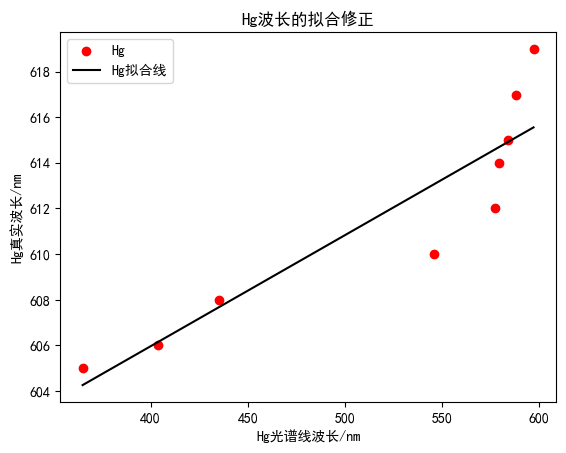

In [13]:
beta,apha= np.polyfit(Hg[1:10],HgTrue[1:10], 1)
print(format(apha,'.2f'),'+',format(beta,'.2f'),'\\lambda_{Hg}^0')
plt.scatter(Hg[1:10],HgTrue[1:10],label='Hg',color='red')
plt.plot(Hg[1:10],[apha+beta*i for i in Hg[1:10]], color='black', label='Hg拟合线')
plt.legend()
plt.xlabel('Hg光谱线波长/nm')
plt.ylabel('Hg真实波长/nm')
plt.title('Hg波长的拟合修正')
plt.show()

##### 修正$\lambda$

In [14]:
for i in range(3,6):
    print(format(apha,'.2f'),'+',format(beta,'.2f'),'\\times',format(H[i],'.2f'),'=',format(apha+beta*H[i],'.2f'))
    H[i]=apha+beta*H[i]
for i in range(3,6):
    print(format(apha,'.2f'),'+',format(beta,'.2f'),'\\times',format(D[i],'.2f'),'=',format(apha+beta*D[i],'.2f'))
    D[i]=apha+beta*D[i]


586.44 + 0.05 \times 656.00 = 618.44
586.44 + 0.05 \times 486.00 = 610.15
586.44 + 0.05 \times 434.00 = 607.61
586.44 + 0.05 \times 656.00 = 618.44
586.44 + 0.05 \times 487.00 = 610.19
586.44 + 0.05 \times 434.00 = 607.61


##### 计算$R_H$

In [15]:
RH=[0]*(n+10)
RH_bar=0
for i in range(3,6):
    RH[i]=1/(H[i]*(1/2**2-1/i**2))
    print("\\frac{1}{",H[i],"(\\frac{1}{2^2}-\\frac{1}{",i,"^2})}=",toMarkdown(RH[i]))
print("\\frac{",end='')
for i in range(3,6):
    RH_bar+=RH[i]
    print(toMarkdown(RH[i]),'+',end='')
print("}{3}=",end='')
RH_bar=RH_bar/3.0
print(toMarkdown(RH_bar))

\frac{1}{ 618.4398226435692 (\frac{1}{2^2}-\frac{1}{ 3 ^2})}= 1.16\times10^{-2}
\frac{1}{ 610.1461459595486 (\frac{1}{2^2}-\frac{1}{ 4 ^2})}= 8.74\times10^{-3}
\frac{1}{ 607.609256620907 (\frac{1}{2^2}-\frac{1}{ 5 ^2})}= 7.84\times10^{-3}
\frac{1.16\times10^{-2} +8.74\times10^{-3} +7.84\times10^{-3} +}{3}=9.41\times10^{-3}


##### 计算$R_D$

In [16]:
RD=[0]*(n+10)
RD_bar=0
for i in range(3,6):
    RD[i]=1/(D[i]*(1/2**2-1/i**2))
    print("\\frac{1}{",D[i],"(\\frac{1}{2^2}-\\frac{1}{",i,"^2})}=",toMarkdown(RD[i]))
print("\\frac{",end='')
for i in range(3,6):
    RD_bar+=RD[i]
    print(toMarkdown(RD[i]),'+',end='')
print("}{3}=",end='')
RD_bar=RD_bar/3.0
print(toMarkdown(RD_bar))

\frac{1}{ 618.4398226435692 (\frac{1}{2^2}-\frac{1}{ 3 ^2})}= 1.16\times10^{-2}
\frac{1}{ 610.194932292984 (\frac{1}{2^2}-\frac{1}{ 4 ^2})}= 8.74\times10^{-3}
\frac{1}{ 607.609256620907 (\frac{1}{2^2}-\frac{1}{ 5 ^2})}= 7.84\times10^{-3}
\frac{1.16\times10^{-2} +8.74\times10^{-3} +7.84\times10^{-3} +}{3}=9.41\times10^{-3}


##### 计算${m_D \over m_H}$


In [17]:
m_H=1.6737e-27
m_e=9.1094e-31
ans=(RH_bar/RD_bar)/(1-m_H/m_e*(RD_bar/RH_bar-1))
print("\\frac{\\frac{",toMarkdown(RH_bar),"}{",toMarkdown(RD_bar),"}}{1-\\frac{",toMarkdown(m_H),"}{",toMarkdown(m_e),"}(\\frac{",toMarkdown(RD_bar),"}{",toMarkdown(RH_bar),"}-1)}=",toMarkdown(ans))

\frac{\frac{ 9.41\times10^{-3} }{ 9.41\times10^{-3} }}{1-\frac{ 1.67\times10^{-27} }{ 9.11\times10^{-31} }(\frac{ 9.41\times10^{-3} }{ 9.41\times10^{-3} }-1)}= 9.57\times10^{-1}
